In [1]:
import pandas as pd
from collections import Counter

In [2]:
df_master = pd.read_csv("PSCompPars_2024.01.15_14.20.59.csv", skiprows=88)
df_habitable = pd.read_csv("hwc.csv")

In [5]:
print(df_master.columns.tolist())

['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra',

In [6]:
display(df_master.head(10))

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
5,17 Sco b,17 Sco,1,1,Radial Velocity,2020,Lick Observatory,0,578.38000,2.01000,...,-2.59000,5.22606,0.023,-0.023,2.094,0.244,-0.244,4.75429,0.005055,-0.005055
6,18 Del b,18 Del,2,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,982.85000,1.06000,...,-0.62170,5.51048,0.023,-0.023,3.366,0.204,-0.204,5.27476,0.002654,-0.002654
7,1RXS J160929.1-210524 b,1RXS J160929.1-210524,1,1,Imaging,2008,Gemini Observatory,0,NaN,NaN,...,-1.30700,12.61800,0.069,-0.069,8.916,0.021,-0.021,12.05720,0.002275,-0.002275
8,24 Boo b,24 Boo,1,1,Radial Velocity,2018,Okayama Astrophysical Observatory,0,30.33000,0.00000,...,-0.63685,5.59000,0.001,-0.001,3.159,0.280,-0.280,5.33390,0.002000,-0.002000
9,24 Sex b,24 Sex,1,2,Radial Velocity,2010,Lick Observatory,0,452.80000,2.10000,...,-0.67280,6.45350,0.023,-0.023,4.285,0.016,-0.016,6.20374,0.000498,-0.000498


In [7]:
df_master["pl_orbper"].describe()

count    5.323000e+03
mean     8.035347e+04
std      5.512524e+06
min      9.070629e-02
25%      4.467694e+00
50%      1.157890e+01
75%      4.160075e+01
max      4.020000e+08
Name: pl_orbper, dtype: float64

In [8]:
from collections import Counter
print(Counter(df_master["discoverymethod"].tolist()))

Counter({'Transit': 4151, 'Radial Velocity': 1075, 'Microlensing': 207, 'Imaging': 69, 'Transit Timing Variations': 28, 'Eclipse Timing Variations': 17, 'Orbital Brightness Modulation': 9, 'Pulsar Timing': 7, 'Astrometry': 3, 'Pulsation Timing Variations': 2, 'Disk Kinematics': 1})


In [9]:
print("Common number of stars:")
print(Counter(df_master["sy_snum"].tolist()))

Common number of stars:
Counter({1: 5061, 2: 441, 3: 65, 4: 2})


In [11]:
print("Plant radius compare to Jupiter:")
print(df_master["pl_radj"].describe())

Plant radius compare to Jupiter:
count    5549.000000
mean        0.508074
std         0.473964
min         0.028000
25%         0.159000
50%         0.248000
75%         1.058000
max         6.900000
Name: pl_radj, dtype: float64


In [12]:
print(df_habitable.columns.tolist())

['P_NAME', 'P_DETECTION', 'P_DISCOVERY_FACILITY', 'P_YEAR', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX', 'P_MASS_LIMIT', 'P_MASS_ORIGIN', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_RADIUS_LIMIT', 'P_PERIOD', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'P_PERIOD_LIMIT', 'P_SEMI_MAJOR_AXIS', 'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_SEMI_MAJOR_AXIS_LIMIT', 'P_ECCENTRICITY', 'P_ECCENTRICITY_ERROR_MIN', 'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_LIMIT', 'P_INCLINATION', 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION_ERROR_MAX', 'P_INCLINATION_LIMIT', 'P_OMEGA', 'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_OMEGA_LIMIT', 'S_NAME', 'S_TYPE', 'S_RA', 'S_DEC', 'S_RA_STR', 'S_DEC_STR', 'S_MAG', 'S_MAG_ERROR_MIN', 'S_MAG_ERROR_MAX', 'S_DISTANCE', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 'S_TEMPERATURE', 'S_TEMPERATURE_ERROR_MIN', 'S_TEMPERATURE_ERROR_MAX', 'S_TEMPERATURE_LIMIT', 'S_MASS', 'S_MASS_ERROR_MIN', 'S_MASS_ERROR_MAX', 'S_MASS_LIMIT', 'S_RAD

In [13]:
print(df_habitable.shape)

(5569, 115)


In [14]:
print(df_habitable["P_RADIUS"].describe())

count    5569.000000
mean        5.709658
std         5.340849
min         0.000000
25%         1.780000
50%         2.780000
75%        11.893000
max        77.342000
Name: P_RADIUS, dtype: float64


In [15]:
print(df_habitable["P_PERIOD"].describe())

count    5.323000e+03
mean     8.035347e+04
std      5.512524e+06
min      9.070629e-02
25%      4.467694e+00
50%      1.157890e+01
75%      4.160075e+01
max      4.020000e+08
Name: P_PERIOD, dtype: float64


In [42]:
df_habitable_["P_PERIOD"] = df_habitable["P_PERIOD"].fillna("$")
df_habitable_ = df_habitable_[df_habitable_["P_PERIOD"] != "$"]
period_list = df_habitable_["P_PERIOD"].tolist()
radius_list = df_habitable_["P_RADIUS"].tolist()
max_value = max(period_list)
df_hab = df_habitable_[df_habitable_["P_PERIOD"] != max_value]
df_hab["log_peroid"] = np.log(df_hab["P_PERIOD"].tolist())

/Users/brihat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


5322
5322


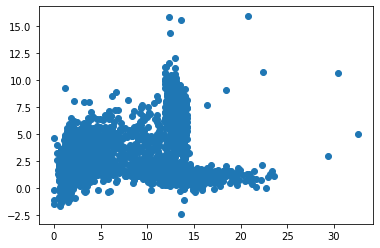

In [50]:
import numpy as np
import matplotlib.pyplot as plt
print(len(df_hab["log_peroid"].tolist()))
print(len(df_hab["P_RADIUS"].tolist()))
df_hab = df_hab.sort_values(by=['P_RADIUS'], ascending=True)
plt.scatter("P_RADIUS","log_peroid",data=df_hab)


In [54]:
print(Counter(df_habitable["P_HABITABLE"].tolist()))

Counter({0: 5500, 2: 40, 1: 29})


In [3]:
df_habitable_only = df_habitable[df_habitable["P_HABITABLE"].isin([1, 2])]

In [4]:
print(df_habitable_only.shape)

(69, 115)


In [60]:
print(df_habitable_only["P_PERIOD"].describe())

count     69.000000
mean      73.775838
std       81.194730
min        4.049219
25%       18.449800
50%       36.116000
75%      112.305300
max      384.843000
Name: P_PERIOD, dtype: float64


In [71]:
print(df_habitable.dtypes.to_dict())

{'P_NAME': dtype('O'), 'P_DETECTION': dtype('O'), 'P_DISCOVERY_FACILITY': dtype('O'), 'P_YEAR': dtype('int64'), 'P_MASS': dtype('float64'), 'P_MASS_ERROR_MIN': dtype('float64'), 'P_MASS_ERROR_MAX': dtype('float64'), 'P_MASS_LIMIT': dtype('int64'), 'P_MASS_ORIGIN': dtype('O'), 'P_RADIUS': dtype('float64'), 'P_RADIUS_ERROR_MIN': dtype('float64'), 'P_RADIUS_ERROR_MAX': dtype('float64'), 'P_RADIUS_LIMIT': dtype('int64'), 'P_PERIOD': dtype('float64'), 'P_PERIOD_ERROR_MIN': dtype('float64'), 'P_PERIOD_ERROR_MAX': dtype('float64'), 'P_PERIOD_LIMIT': dtype('int64'), 'P_SEMI_MAJOR_AXIS': dtype('float64'), 'P_SEMI_MAJOR_AXIS_ERROR_MIN': dtype('float64'), 'P_SEMI_MAJOR_AXIS_ERROR_MAX': dtype('float64'), 'P_SEMI_MAJOR_AXIS_LIMIT': dtype('int64'), 'P_ECCENTRICITY': dtype('float64'), 'P_ECCENTRICITY_ERROR_MIN': dtype('float64'), 'P_ECCENTRICITY_ERROR_MAX': dtype('float64'), 'P_ECCENTRICITY_LIMIT': dtype('int64'), 'P_INCLINATION': dtype('float64'), 'P_INCLINATION_ERROR_MIN': dtype('float64'), 'P_INCL

In [74]:
print(df_habitable_only["P_MASS"].describe())

count    69.000000
mean      3.971343
std       2.271671
min       0.388000
25%       2.210000
50%       3.820000
75%       5.480000
max       9.440000
Name: P_MASS, dtype: float64


In [61]:
from scipy import stats

In [63]:
x = [1.3, 3.5, 5.4, 7.2, 9.1]
y = [2.11, 4.23, 0.6, 7.8]
print(stats.kruskal(x, y))

KruskalResult(statistic=0.5400000000000027, pvalue=0.4624327264504752)


In [64]:
print(stats.kruskal(df_habitable_only["P_PERIOD"].tolist(), df_habitable["P_PERIOD"].tolist()))

KruskalResult(statistic=nan, pvalue=nan)


In [90]:
item_kuskral = ['P_MASS','P_RADIUS',"P_PERIOD",'P_SEMI_MAJOR_AXIS','P_ECCENTRICITY','P_INCLINATION','P_OMEGA',
               'S_RA','S_DEC','S_MAG','S_DISTANCE','S_TEMPERATURE','S_MASS','S_RADIUS','S_METALLICITY','S_AGE','S_LOG_LUM',
               'S_LOG_G','P_ESCAPE','P_POTENTIAL','P_GRAVITY','P_DENSITY','P_HILL_SPHERE','P_DISTANCE','P_PERIASTRON','P_APASTRON',
               'P_DISTANCE_EFF','P_FLUX','P_TEMP_EQUIL','P_TEMP_SURF','S_LUMINOSITY','S_SNOW_LINE','S_ABIO_ZONE','S_TIDAL_LOCK','P_ESI',
               ]

In [5]:
df_nonhabitable_only = df_habitable[df_habitable["P_HABITABLE"].isin([0])]

In [6]:
print(df_nonhabitable_only.shape)

(5500, 115)


In [91]:
import statistics
med_list_non_habitable = []
med_list_habitable = []
p_values = []
#item_kuskral = ['P_PERIOD']
for eachitem in item_kuskral:
    list_non_hab = df_nonhabitable_only[eachitem].tolist()
    list_non_hab = [x for x in list_non_hab if str(x) != 'nan']
    list_hab = df_habitable_only[eachitem].tolist()
    list_hab = [x for x in list_hab if str(x) != 'nan']
    med_list_habitable.append(statistics.median(list_hab))
    med_list_non_habitable.append(statistics.median(list_non_hab))
    s, p = stats.kruskal(list_hab, list_non_hab)
    p_values.append(p)

df_stats = pd.DataFrame({'Var': item_kuskral,'Hab_Planet':med_list_habitable,'Non_Hab_Planet':med_list_non_habitable,'p_values':p_values})
    
    

In [92]:
display(df_stats)

,Var,Hab_Planet,Non_Hab_Planet,p_values
0,P_MASS,3.820000,8.700000,2.466732e-14
1,P_RADIUS,1.780000,2.810000,3.680643e-14
2,P_PERIOD,36.116000,11.390967,1.127631e-08
3,P_SEMI_MAJOR_AXIS,0.164000,0.101700,3.513590e-02
4,P_ECCENTRICITY,0.050500,0.000000,4.346340e-05
5,P_INCLINATION,89.814000,88.740000,8.021575e-12
6,P_OMEGA,88.000000,104.000000,2.227054e-01
7,S_RA,259.751060,286.036300,1.475068e-02
8,S_DEC,5.225807,39.940657,1.367964e-02
9,S_MAG,13.979000,13.472000,1.811184e-02


In [93]:
df_stats.to_csv("data_significance.csv",sep=",", index=False)

In [9]:
from scipy.stats import chi2_contingency


In [33]:
categorical_tables = ['P_MASS_ORIGIN', 'P_DETECTION','S_TYPE_TEMP','S_CONSTELLATION','S_TYPE']
for x in categorical_tables:
    print(x)
    itemA = df_habitable_only[x].tolist()
    cA = Counter(itemA)
    #print(cA)
    itemB = df_nonhabitable_only[x].tolist()
    cB = Counter(itemB)
    #print(cB)
    table = []
    for k, v in cA.items():
        if str(k) != "nan":
            numA = cA.get(k)
            numB = cB.get(k)
            if numB is not None:
                print(k, round((numA/69)*100,3), round((numB/5500)*100,3 ))
                table.append([numA, numB])
        else:
            continue
    print(table)
    chi2_stat, p, dof, expected = chi2_contingency(table)
    print(f"chi2 statistic:     {chi2_stat:.5g}")
    print(f"p-value:            {p:.5g}")
    print(f"degrees of freedom: {dof}")
    print("----------------------")


P_MASS_ORIGIN
M-R relationship 42.029 52.018
Msini 42.029 14.982
Mass 15.942 32.636
----------------------
P_DETECTION
Transit 57.971 74.745
Radial Velocity 42.029 19.018
----------------------
S_TYPE_TEMP
M 73.913 8.982
G 5.797 42.655
K 20.29 26.491
----------------------
S_CONSTELLATION
Dorado 4.348 0.345
Eridanus 5.797 1.255
Hydra 2.899 1.145
Lyra 14.493 18.836
Cygnus 18.841 29.855
Virgo 4.348 3.4
Cepheus 1.449 0.473
Draco 2.899 4.4
Aquarius 7.246 2.127
Leo 2.899 1.364
Cetus 4.348 1.491
Ophiuchus 1.449 1.182
Scorpius 5.797 1.618
Puppis 1.449 0.564
Volans 1.449 0.255
Taurus 1.449 1.564
Camelopardalis 1.449 0.382
Lepus 1.449 0.527
Canis Minor 1.449 0.182
Horologium 2.899 0.2
Libra 1.449 0.745
Aries 2.899 0.364
Pictor 1.449 0.418
Cancer 1.449 2.327
Centaurus 1.449 1.145
Serpens 1.449 0.436
Vela 1.449 0.455
----------------------
S_TYPE
M2.5 V 7.246 0.327
M2.5 1.449 0.109
M2 V 4.348 0.236
M2V 1.449 0.018
M6 V 1.449 0.018
G2 1.449 0.273
K2 1.449 0.218
K2 V 2.899 0.764
M5.5 V 7.246 0.055


In [35]:
print(Counter(df_habitable_only["S_NAME"].tolist()))

Counter({'TRAPPIST-1': 4, 'GJ 667 C': 3, 'TOI-700': 2, 'GJ 180': 2, 'Kepler-296': 2, 'Kepler-62': 2, 'GJ 1002': 2, 'GJ 1061': 2, "Teegarden's Star": 2, 'GJ 3293': 1, 'GJ 433': 1, 'LP 890-9': 1, 'Kepler-705': 1, 'Kepler-452': 1, 'Kepler-1649': 1, 'K2-9': 1, 'Kepler-1544': 1, 'Kepler-1410': 1, 'Kepler-1540': 1, 'Kepler-1606': 1, 'Kepler-1653': 1, 'HD 216520': 1, 'Kepler-283': 1, 'K2-18': 1, 'Wolf 1061': 1, 'GJ 682': 1, 'HIP 38594': 1, 'Kepler-1701': 1, 'GJ 357': 1, 'GJ 514': 1, 'TOI-715': 1, 'K2-288 B': 1, 'Kepler-22': 1, 'K2-3': 1, 'Kepler-174': 1, 'Kepler-440': 1, 'Kepler-442': 1, 'Ross 128': 1, 'TOI-2257': 1, 'GJ 229': 1, 'GJ 273': 1, 'GJ 163': 1, 'HN Lib': 1, 'Kepler-1638': 1, 'Kepler-1652': 1, 'Kepler-186': 1, 'LHS 1140': 1, 'Kepler-1229': 1, 'Kepler-155': 1, 'HD 40307': 1, 'K2-72': 1, 'Kepler-443': 1, 'K2-332': 1, 'Proxima Cen': 1, 'Ross 508': 1, 'Wolf 1069': 1, 'GJ 367': 1})


In [36]:
print(df_habitable.shape)

(5569, 115)


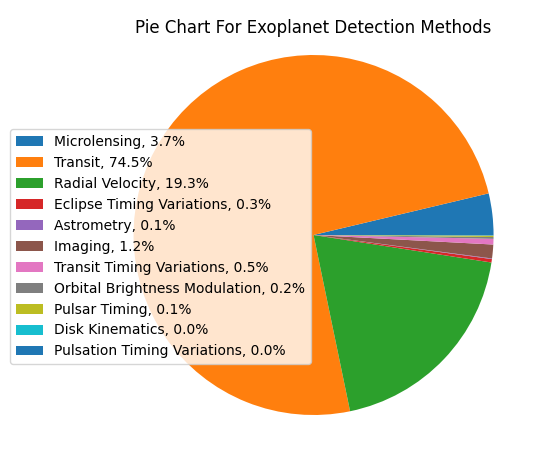

In [100]:
import matplotlib.pyplot as plt
import numpy as np

labels, values = zip(*Counter(df_habitable["P_DETECTION"]).items())

indexes = np.arange(len(labels))
width = 1

plt.pie(values)
value_per = []
for x in values:
    value_per.append(round((x/5569)*100,3))
#plt.xticks(indexes + width * 0.5, labels)
#value_per = sorted(value_per)
labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, value_per)]
plt.legend(bbox_to_anchor=(-0.19, 0.75), loc='upper left', labels=labels, fontsize=10)
plt.title("Pie Chart For Exoplanet Detection Methods", y=0.93)
plt.tight_layout()
plt.savefig("piechat_exoplanet.png", dpi=300)
plt.show()

In [158]:
labels = ['TRAPPIST-1', 'GJ 667 C', 'TOI-700', 'GJ 180', 
        'Kepler-296', 'Kepler-62', 'GJ 1002', 'GJ 1061', 
        "Teegarden's Star"]
light_year = []
for x in labels:
    light_year.append((df_habitable_only[df_habitable_only["S_NAME"] == x]).iloc[0]["S_MASS"])
print(light_year)

[0.09, 0.33, 0.42, 0.43, 0.5, 0.69, 0.12, 0.12, 0.09]


[2, 2, 2, 2, 2, 2, 2, 3, 4]


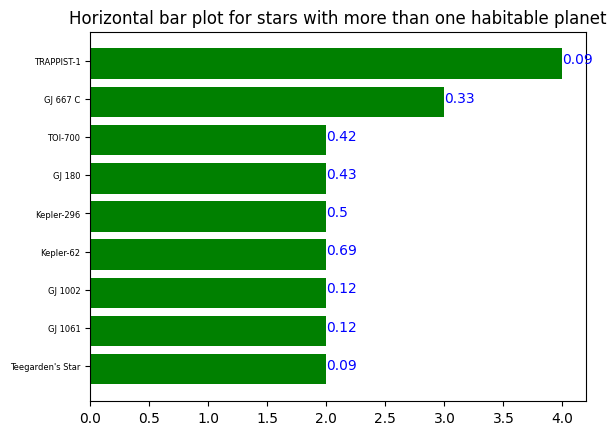

In [166]:

labels, values = zip(*Counter(df_habitable_only["S_NAME"]).items())
width = 0.8
values = [x for x in values if x > 1]
values = sorted(values)
indexes = np.arange(len(values))
print(values)
fig, ax = plt.subplots()
ax.barh(indexes, values, width, color="green")
labels = ['TRAPPIST-1', 'GJ 667 C', 'TOI-700', 'GJ 180', 
        'Kepler-296', 'Kepler-62', 'GJ 1002', 'GJ 1061', 
        "Teegarden's Star"][::-1]

plt.yticks(indexes + width * 0.1, labels, fontsize=6)
values_re = values[::-1]
for i, v in enumerate(light_year[::-1]):
    ax.text(values[i], i, str(round(v,2)), color='blue')

ax.set_title("Horizontal bar plot for stars with more than one habitable planet")
plt.savefig("barh_stars.png", dpi=300)
plt.show()